# Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def create_random_data():
    N = 1000
    data1 = np.random.normal(0, 0.1, N)
    data2 = (np.random.normal(1, 0.4, N) + np.linspace(0, 1, N))
    data3 = 2 + (np.random.random(N) * np.linspace(1, 5, N))
    data4 = (np.random.normal(3, 0.2, N) + 0.3 * np.sin(np.linspace(0, 20, N)))
    
    data = np.vstack([data1, data2, data3, data4])
    data = data.transpose()
    
    cols = ['data1', 'data2', 'data3', 'data4']

    df = pd.DataFrame(data, columns=cols)
    return df

In [9]:
df = create_random_data()

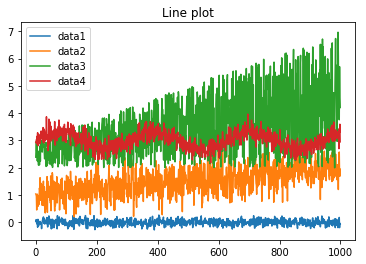

In [10]:
df.plot(title='Line plot');

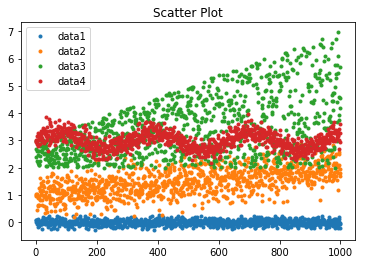

In [11]:
df.plot(style='.', title='Scatter Plot');

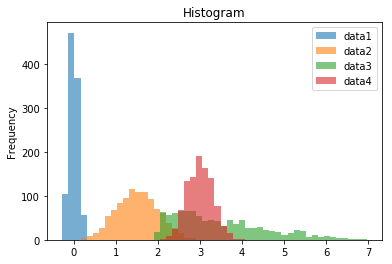

In [12]:
df.plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.6);

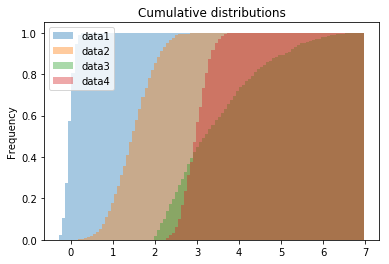

In [13]:
df.plot(kind='hist',
        bins=100,
        title='Cumulative distributions',
        density=True,
        cumulative=True,
        alpha=0.4);

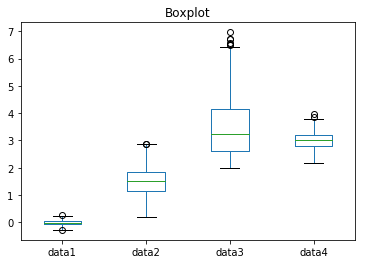

In [14]:
df.plot(kind='box',
        title='Boxplot');

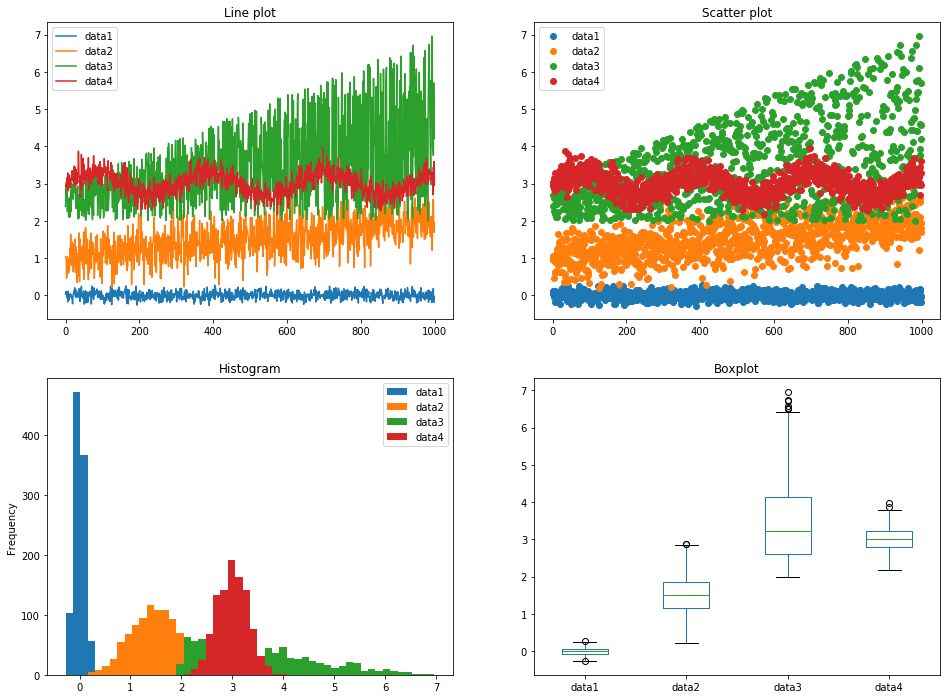

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(16,12))

df.plot(ax=ax[0][0],
        title='Line plot')

df.plot(ax=ax[0][1],
        style='o',
        title='Scatter plot')

df.plot(ax=ax[1][0],
        kind='hist',
        bins=50,
        title='Histogram')

df.plot(ax=ax[1][1],
        kind='box',
        title='Boxplot');

In [16]:
categories = df['data1'] > 0.01

In [17]:
counts = categories.value_counts()
counts

False    558
True     442
Name: data1, dtype: int64

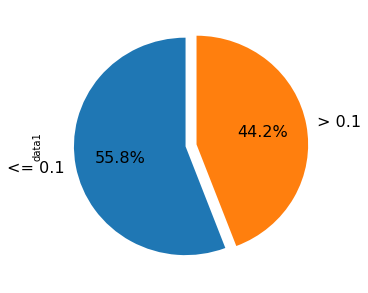

In [24]:
counts.plot(kind='pie',
            figsize=(5, 5),
            explode=[0, 0.1],
            labels=['<= 0.1', '> 0.1'],
            autopct='%1.1f%%',
            shadow=False,
            startangle=90,
            fontsize=16);

## Exercises:

### Exercise 1
- load the dataset: ../data/international-airline-passengers.csv
- inspect it using the .info() and .head() commands
- use the function pd.to_datetime() to change the column type of 'Month' to a datatime type
- set the index of df to be a datetime index using the column 'Month' and the df.set_index() method
- choose the appropriate plot and display the data
- choose appropriate scale
- label the axes
- discuss with your neighbor

In [99]:
df = pd.read_csv('../data/international-airline-passengers.csv')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                  144 non-null object
Thousand Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [101]:
df.head()

,Month,Thousand Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [102]:
df.describe()

,Thousand Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [103]:
type(df['Month'])

pandas.core.series.Series

In [104]:
df['Month'] = pd.to_datetime(df['Month'])
type(df['Month'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [105]:
df.set_index('Month', inplace=True)

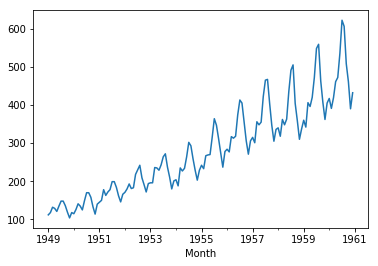

In [106]:
df['Thousand Passengers'].plot()

### Exercise 2
- load the dataset: ../data/weight-height.csv
- inspect it
- plot it using a scatter plot with Weight as a function of Height
- plot the male and female populations with 2 different colors on a new scatter plot
- remember to label the axes
- discuss


In [58]:
df2 = pd.read_csv('../data/weight-height.csv')

In [107]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [108]:
df2.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [113]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


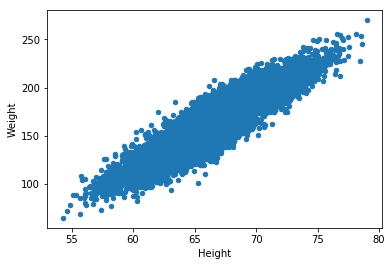

In [109]:
df2.plot.scatter('Height','Weight')

In [119]:
male = df2[df2['Gender'] == 'Male']

In [120]:
female = df2[df2['Gender'] == 'Female']

### Exercise 3
- plot the histogram of the heights for males and for females on the same plot
- use alpha to control transparency in the plot comand
- plot a vertical line at the mean of each population using plt.axvline()
